In [1]:
# python imports
import json
import os

# third-party imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
files = list()

for file in os.listdir('../output/'):
    if file.endswith('.json'):
        files.append(file)

In [3]:
with open(f'../output/{files[-1]}') as file:
    iterations = json.load(file)['iterations']

In [4]:
initial = {
    "cvss_score": 0,
    "exploit": 0,
    "epss": 0,
    "environment": 0,
    "asset_type": 0,
    "critical_asset": 0
}

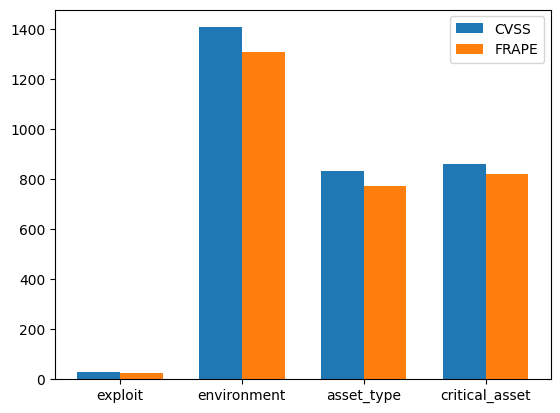

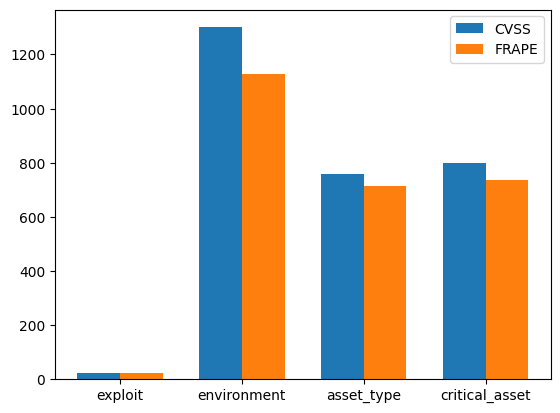

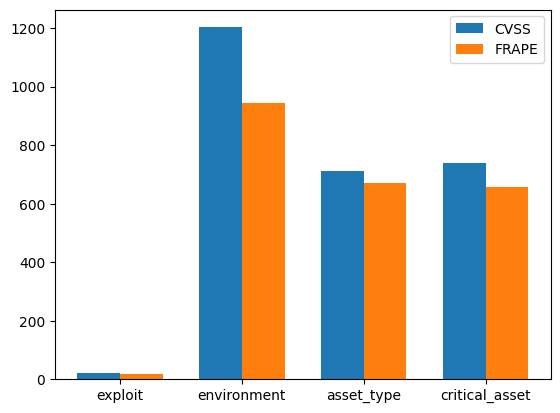

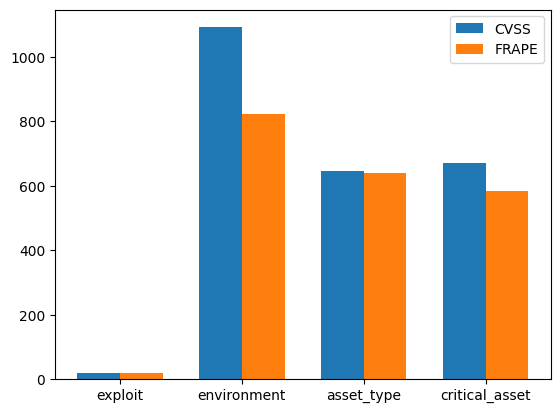

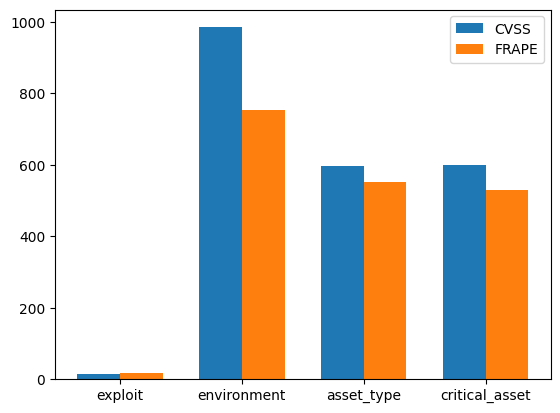

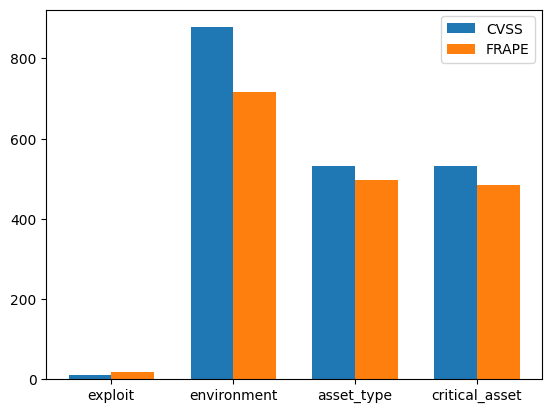

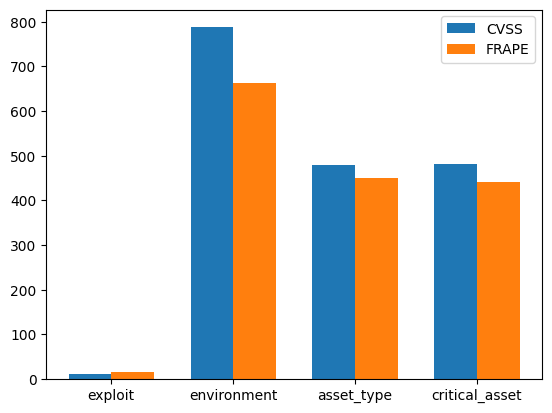

In [5]:
for key, stats in iterations.items():
    
    if key == '0':
        continue
        
    cvss = stats['stats_cvss']
    frape = stats['stats_frape']

    del cvss['cvss_score']
    del frape['cvss_score']

    del cvss['epss']
    del frape['epss']

    labels = list(cvss.keys())

    x = np.arange(len(labels))
    width = 0.35

    fix, ax = plt.subplots()

    rects1 = ax.bar(x - width/2, cvss.values(), width, label='CVSS')
    rects2 = ax.bar(x + width/2, frape.values(), width, label='FRAPE')

    ax.set_xticks(x, labels)

    ax.legend()
    plt.show()